# datathon 24 Notebook

Bu notebook datathon2024 yarışması için hazırlanmıştır.

## Problem Def
    Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
    Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)
## Evaluation
    Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.
## data
    Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/datan Olunan Üniversite
id
Degerlendirme Puani

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
test=pd.read_csv("data/test_x.csv",low_memory=False)

In [5]:
train=pd.read_csv("data/train.csv",low_memory=False)
train.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [6]:
train=train.drop(index=65124)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65124 entries, 0 to 65123
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65124 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64955 non-null  object 
 3   Dogum Tarihi                                               64947 non-null  object 
 4   Dogum Yeri                                                 64333 non-null  object 
 5   Ikametgah Sehri                                            63087 non-null  object 
 6   Universite Adi                                             64992 non-null  object 
 7   Universite Turu                                            64869 non-null  object 
 8   Burslu

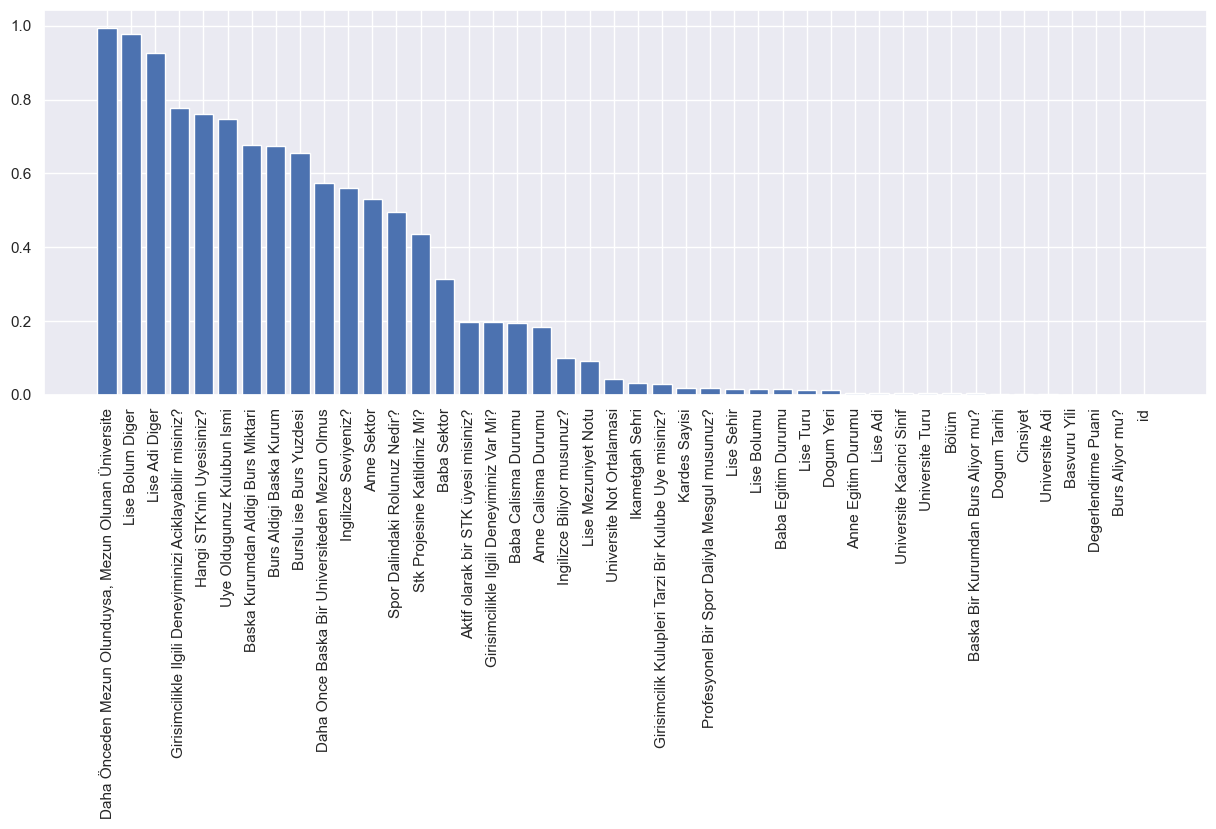

In [8]:
null_ratios = train.isnull().sum() / len(train)
null_ratios_over70=null_ratios[null_ratios>0.70]
null_ratios.sort_values(ascending=False, inplace=True)
# Let's visulize
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(null_ratios.keys(), null_ratios.values);

In [9]:
# Bazı kolonlar test setinde olmadığı için bazıları ise boş olduğu için kaldıralım
dropped_columns=["Burslu ise Burs Yuzdesi","Daha Once Baska Bir Universiteden Mezun Olmus","Lise Adi Diger","Lise Bolum Diger","Lise Turu","Lise Bolumu","Uye Oldugunuz Kulubun Ismi",
                 "Stk Projesine Katildiniz Mi?","Ingilizce Seviyeniz?","Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite","Baska Kurumdan Aldigi Burs Miktari","Universite Adi","Bölüm","Lise Adi"]
train=train.drop(dropped_columns,axis=1)
test=test.drop(dropped_columns,axis=1)

In [10]:
def find_categorical_columns(df):
    cat_columns=[]
    for col in df.columns:
        if df[col].dtypes=="O":
            cat_columns.append(col)
    return cat_columns
categorical_cols=find_categorical_columns(train)
categorical_cols

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Lise Sehir',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'Ingilizce Biliyor musunuz?']

<Axes: xlabel='Cinsiyet'>

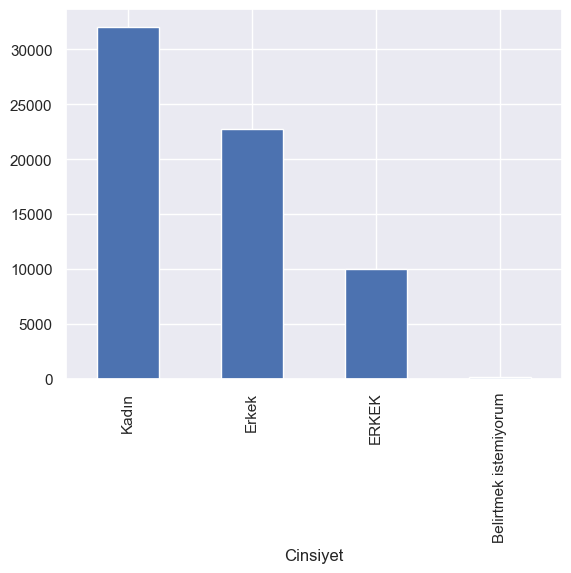

In [11]:
train["Cinsiyet"].value_counts().plot.bar()
## iki farklı erkek kategorisi var?

<Axes: xlabel='Universite Turu'>

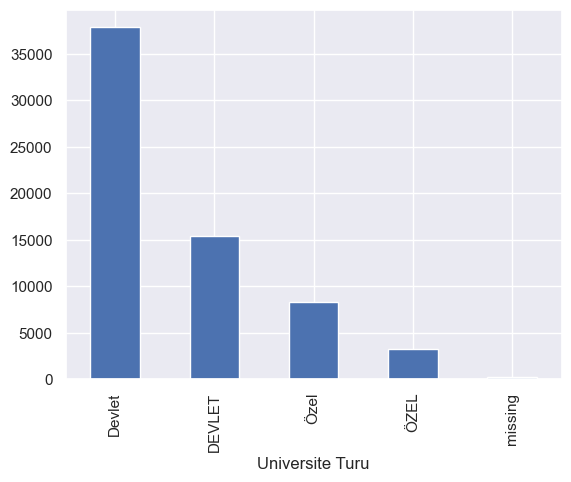

In [12]:
train["Universite Turu"].fillna("missing").value_counts().plot.bar()

<Axes: xlabel='Burs Aliyor mu?'>

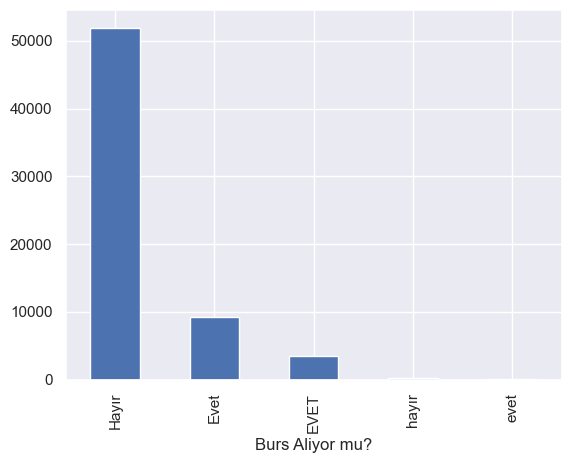

In [13]:
train["Burs Aliyor mu?"].value_counts().plot.bar()

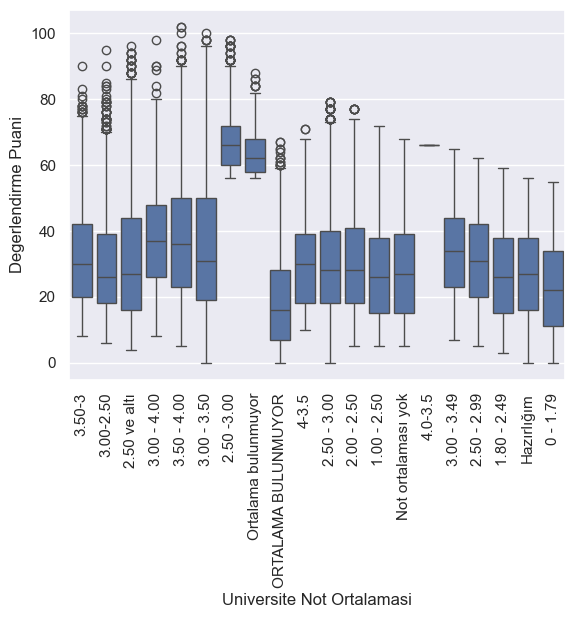

In [14]:
ax=sns.boxplot(data=train,x="Universite Not Ortalamasi",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);
# Not ortalamaları düzgün girilmemiş düzeltilecek

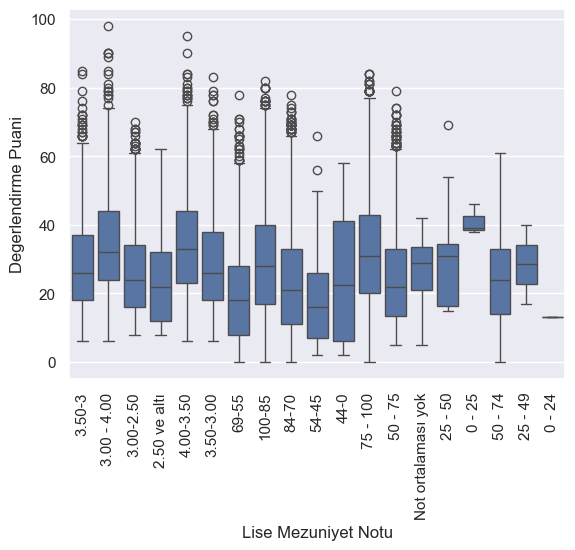

In [15]:
ax=sns.boxplot(data=train,x="Lise Mezuniyet Notu",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);
# Not ortalamaları düzgün girilmemiş düzeltilecek

In [16]:
train["Universite Kacinci Sinif"].value_counts()

Universite Kacinci Sinif
2                21773
3                16956
4                13112
1                10260
Hazırlık          1275
5                  961
Mezun              178
6                  177
hazırlık            33
Yüksek Lisans       15
Tez                  7
0                    3
Name: count, dtype: int64

In [17]:
train["Baska Bir Kurumdan Burs Aliyor mu?"].value_counts()

Baska Bir Kurumdan Burs Aliyor mu?
Hayır    48513
Evet     16380
Name: count, dtype: int64

<Axes: xlabel='Anne Calisma Durumu'>

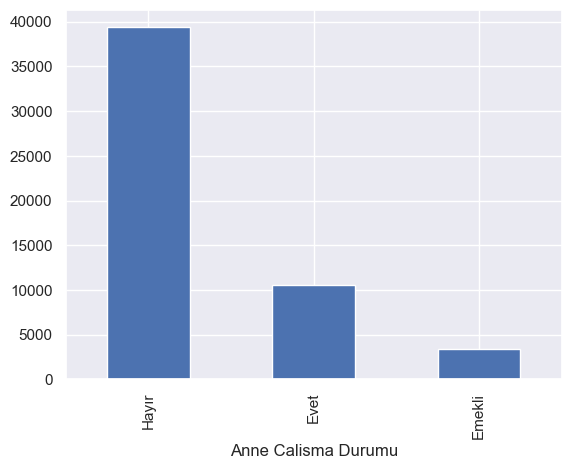

In [18]:
train["Anne Calisma Durumu"].value_counts().plot.bar()

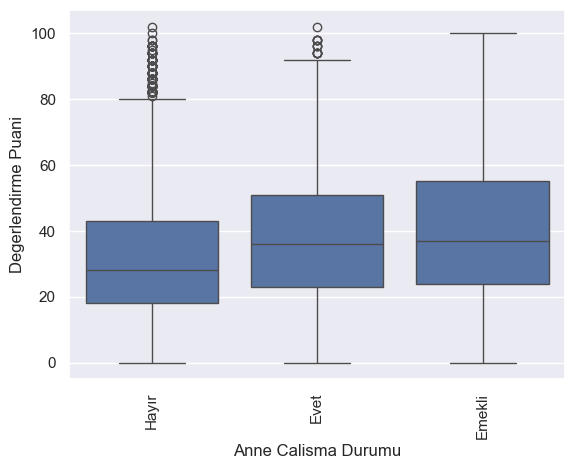

In [19]:
ax=sns.boxplot(data=train,x="Anne Calisma Durumu",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

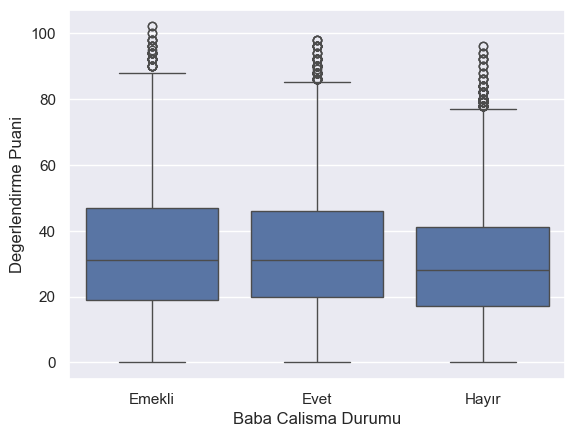

In [20]:
ax=sns.boxplot(data=train,x="Baba Calisma Durumu",y="Degerlendirme Puani",linewidth=1)

In [21]:
train["Kardes Sayisi"].value_counts()
# Kardeş sayısının "." dan öncekileri alıp integer veri tipine dönüştür

Kardes Sayisi
1.0                                             16186
2.0                                             13061
3.0                                              6734
1                                                6054
4.0                                              4611
2                                                3938
0.0                                              3701
5.0                                              3421
3                                                2087
0                                                1381
4                                                 998
5                                                 715
6.0                                               206
7.0                                               159
6                                                 135
10.0                                              127
7                                                 119
8.0                                                98
9.0           

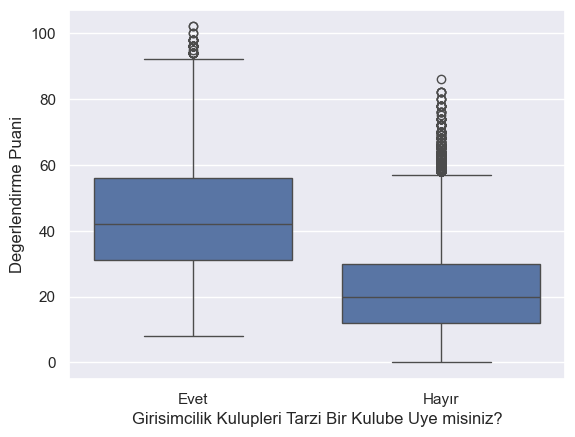

In [22]:
ax=sns.boxplot(data=train,x="Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?",y="Degerlendirme Puani",linewidth=1)
# Önemli bir etken

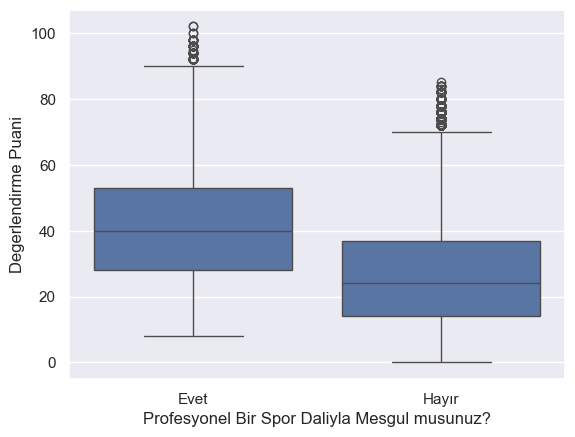

In [23]:
ax=sns.boxplot(data=train,x="Profesyonel Bir Spor Daliyla Mesgul musunuz?",y="Degerlendirme Puani",linewidth=1)
# Önemli bir etken

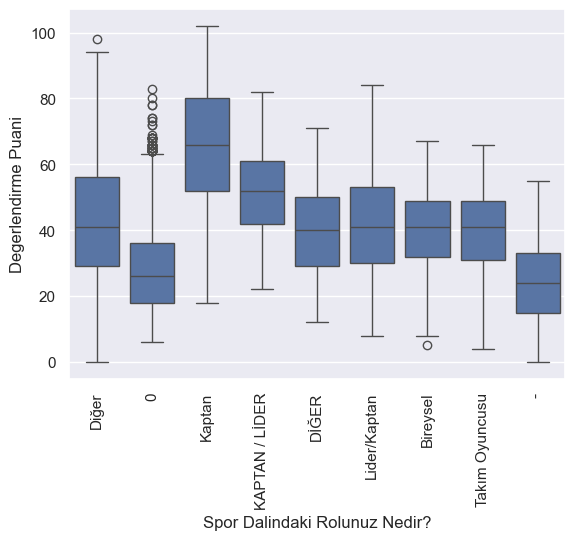

In [24]:
ax=sns.boxplot(data=train,x="Spor Dalindaki Rolunuz Nedir?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

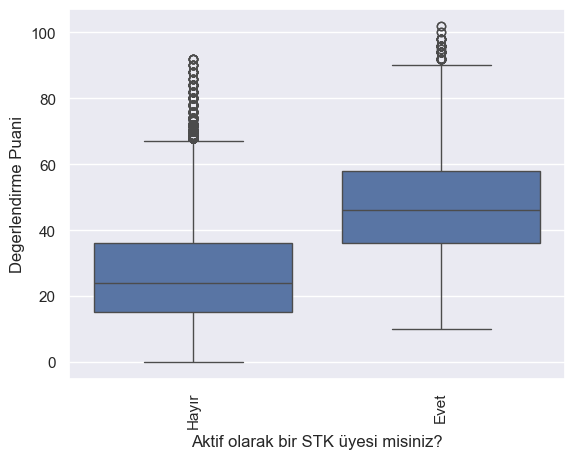

In [25]:
ax=sns.boxplot(data=train,x="Aktif olarak bir STK üyesi misiniz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

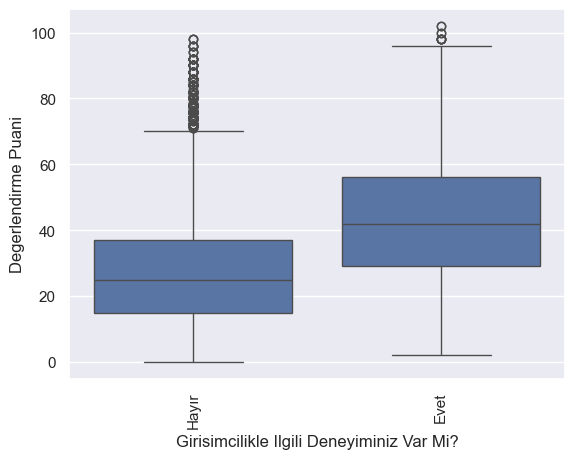

In [26]:
ax=sns.boxplot(data=train,x="Girisimcilikle Ilgili Deneyiminiz Var Mi?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

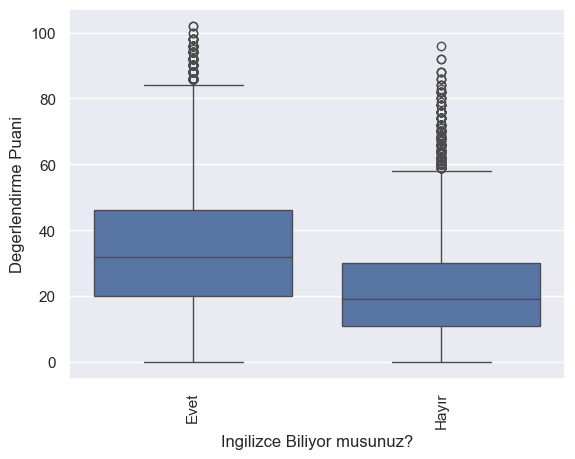

In [27]:
ax=sns.boxplot(data=train,x="Ingilizce Biliyor musunuz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

In [28]:
box_plot_columns=["Universite Not Ortalamasi","Burs Aliyor mu?","Lise Mezuniyet Notu","Anne Calisma Durumu","Baba Calisma Durumu","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"
                 ,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Spor Dalindaki Rolunuz Nedir?","Aktif olarak bir STK üyesi misiniz?","Girisimcilikle Ilgili Deneyiminiz Var Mi?",
                 "Ingilizce Biliyor musunuz?","Anne Sektor","Baba Sektor","Anne Egitim Durumu","Baba Egitim Durumu","Burs Aldigi Baska Kurum","Cinsiyet"]


## data Celaning

In [29]:
# Bu method verilerimizi düzgün bir biçimde lower case yapacak
def turkish_lowercase(text):
    replacements = {
        'İ': 'i',
        'I': 'ı',
        'Ş': 'ş',
        'Ç': 'ç',
        'Ğ': 'ğ',
        'Ö': 'ö',
        'Ü': 'ü',
        'ı': 'ı',
        'ş': 'ş',
        'ç': 'ç',
        'ğ': 'ğ',
        'ö': 'ö',
        'ü': 'ü'
    }
    return ''.join(replacements.get(char, char) for char in text).lower()

### String Değerleri Düzenle (Lowe Case)

In [30]:
low_columns = ['Cinsiyet', 'Dogum Yeri', "Ikametgah Sehri", 
           'Universite Turu', 'Burs Aliyor mu?',
           'Lise Sehir', 'Burs Aldigi Baska Kurum', 'Anne Egitim Durumu',
           'Anne Sektor', 'Baba Calisma Durumu', 'Baba Sektor', 'Spor Dalindaki Rolunuz Nedir?',"Dogum Yeri","Baba Egitim Durumu"]

In [31]:
# Lowecase yapan method
def make_lowercase(list_of_low, df):
    for label in list_of_low:
        df[label]=df[label].fillna("-")
        df[label] = df[label].apply(turkish_lowercase)

In [32]:
make_lowercase(low_columns, train)

In [33]:
make_lowercase(low_columns, test)

### University Note translate


In [34]:
# Fill the empty note data
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].fillna('missing')

In [35]:
test['Universite Not Ortalamasi'].unique()

array(['2.50 - 2.99', 'Hazırlığım', '3.00 - 3.49', '1.80 - 2.49',
       '3.50 - 4.00', '0 - 1.79'], dtype=object)

In [36]:
# Universite Notunu duzgun formata uyarlayiniz.
Univertiy_map = {'Ortalama bulunmuyor': 'missing',
                 'ORTALAMA BULUNMUYOR': 'missing',
                 'Not ortalaması yok': 'missing',
                 'Hazırlığım': 'Hazırlığım',
                 '3.50-3': '3.00 - 3.49',
                 '3.00-2.50': '2.50 - 2.99',
                 '2.50 ve altı': '1.80 - 2.49',
                 '3.00 - 4.00': '3.00 - 3.49',
                 '3.50 - 4.00': '3.50 - 4.00',
                 '3.00 - 3.50': '3.00 - 3.49',
                 '2.50 -3.00': '2.50 - 2.99',
                 '4-3.5': '3.50 - 4.00',
                 '2.50 - 3.00': '2.50 - 2.99',
                 '2.00 - 2.50': '1.80 - 2.49',
                 '1.00 - 2.50': '1.80 - 2.49',
                 '4.0-3.5': '3.50 - 4.00',
                 '3.00 - 3.49': '3.00 - 3.49',
                 '2.50 - 2.99': '2.50 - 2.99',
                 '1.80 - 2.49': '1.80 - 2.49',
                 '0 - 1.79': '0 - 1.79',
                 'missing': 'missing'
                }
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].map(Univertiy_map)

In [37]:
pd.unique(train['Universite Not Ortalamasi'])

array(['3.00 - 3.49', '2.50 - 2.99', 'missing', '1.80 - 2.49',
       '3.50 - 4.00', 'Hazırlığım', '0 - 1.79'], dtype=object)

In [38]:
train['Universite Not Ortalamasi'].isna().sum()

0

### Spor dalindaki rolunuz nedir kolonunu duzenleme


In [39]:
test['Spor Dalindaki Rolunuz Nedir?'].unique()

array(['takım oyuncusu', 'bireysel spor', '-', 'lider/kaptan', 'diğer'],
      dtype=object)

In [40]:
train['Spor Dalindaki Rolunuz Nedir?'].unique()

array(['diğer', '0', '-', 'kaptan', 'kaptan / lider', 'lider/kaptan',
       'bireysel', 'takım oyuncusu'], dtype=object)

In [41]:
spor_mapping = {
    'diğer': 'diğer',
    '0': '-',
    '-': '-',
    'kaptan': 'lider/kaptan',
    'kaptan / li̇der': 'lider/kaptan',
    'di̇ğer': 'diğer', 
    'lider/kaptan': 'lider/kaptan', 
    'bireysel': 'bireysel spor',
    'takım oyuncusu': 'takım oyuncusu'
}

In [42]:
train["Spor Dalindaki Rolunuz Nedir?"] = train["Spor Dalindaki Rolunuz Nedir?"].fillna('-')

In [43]:
# Burdaki verileri test setindeki verilerle aynı formata getiriyoruz
train['Spor Dalindaki Rolunuz Nedir?'] = train['Spor Dalindaki Rolunuz Nedir?'].map(spor_mapping)

In [44]:
# Visulize train unique values
pd.unique(train["Spor Dalindaki Rolunuz Nedir?"])

array(['diğer', '-', 'lider/kaptan', nan, 'bireysel spor',
       'takım oyuncusu'], dtype=object)

### Lise Mezuniyet Notu Düzenleme

In [45]:
train["Lise Mezuniyet Notu"].value_counts(),test["Lise Mezuniyet Notu"].value_counts()

(Lise Mezuniyet Notu
 75 - 100              22432
 84-70                  9141
 100-85                 6967
 4.00-3.50              3689
 50 - 75                3115
 3.00 - 4.00            3101
 3.50-3.00              2759
 3.50-3                 2330
 69-55                  2162
 3.00-2.50              2153
 50 - 74                1007
 2.50 ve altı            226
 54-45                    88
 25 - 50                  14
 Not ortalaması yok       11
 44-0                      6
 0 - 25                    3
 25 - 49                   2
 0 - 24                    1
 Name: count, dtype: int64,
 Lise Mezuniyet Notu
 75 - 100    9742
 50 - 74     1301
 25 - 49        6
 Name: count, dtype: int64)

In [46]:
bir="75-100"
iki="50 - 74"
uc="25 - 49"
lise_mezuniyet_map={
    "75 - 100":bir,
    "84-70":bir,#85-75=10 fark 75-70=5 fark
    "100-85":bir,
    "4.00-3.50":bir,
    "50 - 75":iki,
    "3.00 - 4.00":bir ,
    "3.50-3.00":bir ,
    "3.50-3":bir,
    "69-55":iki,
    "3.00-2.50":iki,
    "50 - 74":iki,
    "2.50 ve altı":uc,
    "25 - 50":uc,
    "25 - 49":uc
}
train['Lise Mezuniyet Notu'] = train['Lise Mezuniyet Notu'].map(lise_mezuniyet_map)

In [47]:
values_to_drop=["Not ortalaması yok","44-0","0 - 25","0 - 24"]
indexes_to_drop = train[train['Lise Mezuniyet Notu'].isin(values_to_drop)].index
train = train.drop(indexes_to_drop)

In [48]:
train["Lise Mezuniyet Notu"].value_counts(),test["Lise Mezuniyet Notu"].value_counts()

(Lise Mezuniyet Notu
 75-100     50419
 50 - 74     8437
 25 - 49      242
 Name: count, dtype: int64,
 Lise Mezuniyet Notu
 75 - 100    9742
 50 - 74     1301
 25 - 49        6
 Name: count, dtype: int64)

### Anne Baba Calisma Durumu

In [49]:
train["Anne Calisma Durumu"].value_counts()

Anne Calisma Durumu
Hayır     39370
Evet      10504
Emekli     3354
Name: count, dtype: int64

In [50]:
test["Anne Calisma Durumu"].value_counts()

Anne Calisma Durumu
Hayır    8691
Evet     2358
Name: count, dtype: int64

### Anne Baba Sektor Verilerini Düzenle

In [51]:
test['Anne Sektor'].unique(),test['Baba Sektor'].unique()

(array(['özel sektör', '-', 'kamu', 'diğer'], dtype=object),
 array(['diğer', 'özel sektör', '-', 'kamu'], dtype=object))

In [52]:
train['Anne Sektor'].unique(),train['Baba Sektor'].unique()

(array(['0', 'kamu', 'özel sektör', 'diğer', '-'], dtype=object),
 array(['0', 'özel sektör', 'kamu', '-', 'diğer'], dtype=object))

In [53]:
train["Anne Sektor"] = train["Anne Sektor"].fillna('-')
train["Baba Sektor"] = train["Baba Sektor"].fillna('-')

In [54]:
sektor_mapping = {
    'diğer': 'diğer',
    '0': '-',
    '-': '-',
    'kamu': 'kamu',
    'özel sektör': 'özel sektör',
}

In [55]:
test["Anne Sektor"].isna().sum(),test["Baba Sektor"].isna().sum()

(0, 0)

In [56]:
train["Anne Sektor"].isna().sum(),train["Baba Sektor"].isna().sum()

(0, 0)

In [57]:
train['Anne Sektor'] = train['Anne Sektor'].map(sektor_mapping)
train['Baba Sektor'] = train['Baba Sektor'].map(sektor_mapping)

In [58]:
train['Anne Sektor'].unique(),train['Baba Sektor'].unique()

(array(['-', 'kamu', 'özel sektör', 'diğer'], dtype=object),
 array(['-', 'özel sektör', 'kamu', 'diğer'], dtype=object))

### Anne Baba Egitim Durumu

In [59]:
test["Anne Egitim Durumu"].value_counts(),test["Baba Egitim Durumu"].value_counts()

(Anne Egitim Durumu
 ilkokul          3977
 lise             2362
 üniversite       1798
 eğitimi yok      1457
 ortaokul         1272
 yüksek lisans     143
 doktora            40
 Name: count, dtype: int64,
 Baba Egitim Durumu
 ilkokul          3144
 üniversite       2728
 lise             2706
 ortaokul         1666
 eğitimi yok       427
 yüksek lisans     272
 doktora           106
 Name: count, dtype: int64)

In [60]:
train["Baba Egitim Durumu"]=train["Baba Egitim Durumu"].fillna("missin")

In [61]:
train["Baba Egitim Durumu"]=train["Baba Egitim Durumu"].apply(turkish_lowercase)

In [62]:
train["Anne Egitim Durumu"].value_counts(),train["Baba Egitim Durumu"].value_counts()

(Anne Egitim Durumu
 ilkokul mezunu             15800
 lise                       12049
 ilkokul                    10350
 üniversite                  7937
 eğitim yok                  4746
 ortaokul mezunu             3907
 eğitimi yok                 3605
 ortaokul                    3126
 lise mezunu                 1346
 üniversite mezunu           1075
 yüksek lisans                427
 -                            406
 doktora                      142
 yüksek lisans / doktora      123
 yüksek lisans / doktara       85
 Name: count, dtype: int64,
 Baba Egitim Durumu
 lise                       14490
 üniversite                 13407
 ilkokul mezunu             11173
 ilkokul                     8256
 ortaokul mezunu             5071
 ortaokul                    4109
 üniversite mezunu           1731
 lise mezunu                 1405
 eğitim yok                  1396
 eğitimi yok                 1102
 -                           1007
 yüksek lisans                963
 doktora      

In [63]:
egitim_durumu_mapping={
    "ilkokul mezunu":"ilkokul",
    "ilkokul":"ilkokul",
    "lise":"lise",
    "lise mezunu":"lise",
    "ortaokul mezunu":"ortaokul",
    "ortaokul":"ortaokul",
    "eğitimi yok":"eğitimi yok",
    "eğitim yok":"eğitimi yok",
    "0":"eğitimi yok",
    "üniversite mezunu":"üniversite",
    "üniversite":"üniversite",
    "yüksek lisans":"yüksek lisans",
    "doktora":"doktora",
    "yüksek lisans / doktora":"doktora",
    "yüksek lisans / doktara":"doktora",   
}

In [64]:
train['Anne Egitim Durumu'] = train['Anne Egitim Durumu'].map(egitim_durumu_mapping)
train['Baba Egitim Durumu'] = train['Baba Egitim Durumu'].map(egitim_durumu_mapping)

In [65]:
test["Anne Egitim Durumu"].value_counts(),test["Baba Egitim Durumu"].value_counts()

(Anne Egitim Durumu
 ilkokul          3977
 lise             2362
 üniversite       1798
 eğitimi yok      1457
 ortaokul         1272
 yüksek lisans     143
 doktora            40
 Name: count, dtype: int64,
 Baba Egitim Durumu
 ilkokul          3144
 üniversite       2728
 lise             2706
 ortaokul         1666
 eğitimi yok       427
 yüksek lisans     272
 doktora           106
 Name: count, dtype: int64)

In [66]:
train["Anne Egitim Durumu"].value_counts()

Anne Egitim Durumu
ilkokul          26150
lise             13395
üniversite        9012
eğitimi yok       8351
ortaokul          7033
yüksek lisans      427
doktora            350
Name: count, dtype: int64

In [67]:
train["Baba Egitim Durumu"].value_counts()

Baba Egitim Durumu
ilkokul          19429
lise             15895
üniversite       15138
ortaokul          9180
eğitimi yok       2609
yüksek lisans      963
doktora            903
Name: count, dtype: int64

### Burs aldigi baska kurum duzenleme

Burslari 3 parcaya ayirdim

1. Kyk Bursu alan - kyk
2. Diger yerlerden (Vakıf vb.) burs alan - diger
2. Burs almayan - yok

In [68]:
array = test['Burs Aldigi Baska Kurum'].value_counts()
array = array[:55]
array

Burs Aldigi Baska Kurum
-                                         6524
kyk                                       1790
kyk bursu                                  300
kredi ve yurtlar kurumu                    215
kredi yurtlar kurumu                       200
devlet                                     160
devlet bursu                                65
gençlik ve spor bakanlığı                   63
kyk devlet bursu                            50
kyk burs                                    47
kyk bursu alıyorum                          45
kredi ve yurtlar genel müdürlüğü            41
gsb                                         29
mehmet zorlu vakfı                          26
tev                                         26
türk eğitim vakfı                           25
kyk bursu alıyorum.                         23
tübitak                                     22
devlet kyk bursu                            20
kyk kredi                                   19
çağdaş yaşamı destekleme derneği    

In [69]:

kyk = 'kyk'
burs_mapping_test ={
'-': '-',
"KYK": kyk,                              
"Kyk": kyk,                                  
"kyk": kyk,                                  
"Devlet": kyk,                               
"Kredi ve Yurtlar Kurumu": kyk,              
"Kredi Yurtlar Kurumu": kyk,                 
"Kyk bursu": kyk,                            
"KYK bursu": kyk,                            
"Devlet bursu": kyk,                         
"Kredi yurtlar kurumu": kyk,                 
"Kredi ve yurtlar kurumu": kyk,              
"KYK Bursu": kyk,                            
"Gençlik ve Spor Bakanlığı": kyk,            
"Kredi ve Yurtlar Genel Müdürlüğü": kyk,     
"KYK burs": kyk,                             
"KYK BURSU": kyk,                            
"Kyk devlet bursu": kyk,                     
"GSB": kyk,                                  
"Kyk bursu alıyorum": kyk,                   
"KYK bursu alıyorum.": kyk,                 
"Kyk Bursu": kyk,                            
"kyk bursu": kyk,                            
"devlet": kyk,                             
"KYK bursu alıyorum": kyk,                  
"KREDİ YURTLAR KURUMU": kyk,         
}

In [70]:

kyk = 'kyk'
burs_mapping_train = {
'kyk': kyk,                                  
'-': '-',                                        
'kredi ve yurtlar kurumu': kyk,                   
'kredi yurtlar kurumu': kyk,                      
'kyk bursu': kyk,                                 
'devlet': kyk,                                    
'devlet bursu': kyk,                              
'k': kyk,                                         
'kyk devlet bursu': kyk,                          
'ky': kyk,                                        
'kyk kredi': kyk,                                 
'gençlik ve spor bakanlığı': kyk,                 
'kyk bursu alıyorum': kyk,                        
'kredi̇ ve yurtlar kurumu': kyk,                  
'kredi ve yurtlar genel müdürlüğü': kyk,          
'kyk burs': kyk,                                  
'kredi̇ yurtlar kurumu': kyk,                     
'yüksek öğrenim kredi ve yurtlar kurumu': kyk,    
}

In [71]:
train['Burs Aldigi Baska Kurum'].isna().sum()

0

In [72]:

train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].fillna('-')

In [73]:

test['Burs Aldigi Baska Kurum'].isna().sum()

0

In [74]:
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].map(burs_mapping_train)

In [75]:
# simdi de farkli kurumlardan burs alan ogrencileri null olarak atadigindan onlara deger verelim
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].fillna('diger')

In [76]:
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].map(burs_mapping_test)

In [77]:
# simdi de farkli kurumlardan burs alan ogrencileri null olarak atadigindan onlara deger verelim
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].fillna('diger')

In [78]:
array = test['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-        6524
diger    2275
kyk      2250
Name: count, dtype: int64

In [79]:
burs_tops = []
array = train['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-        48688
kyk      10208
diger     6228
Name: count, dtype: int64

### Universite Sınıfı

In [80]:
# test setinde boş değer ve mezun değerleri olmadığı için bunları dropluyorum
# 370 tane null değeri de dropluyorum

In [81]:
train["Universite Kacinci Sinif"].value_counts(),test["Universite Kacinci Sinif"].value_counts()

(Universite Kacinci Sinif
 2                21773
 3                16956
 4                13112
 1                10260
 Hazırlık          1275
 5                  961
 Mezun              178
 6                  177
 hazırlık            33
 Yüksek Lisans       15
 Tez                  7
 0                    3
 Name: count, dtype: int64,
 Universite Kacinci Sinif
 2           3315
 3           3039
 4           2466
 1           1803
 Hazırlık     233
 5            164
 6             29
 Name: count, dtype: int64)

In [82]:
values_to_drop=["Mezun","Yüksek Lisans","Tez","0"]

In [83]:
indexes_to_drop = train[train['Universite Kacinci Sinif'].isin(values_to_drop)].index
train = train.drop(indexes_to_drop)

### Doğum Yerlerini Düzenleyelim

In [84]:
# Test veri setindeki hakkari yi hakkâri yapalım
test['Dogum Yeri'] = test["Dogum Yeri"].replace('hakkari', 'hakkâri')

In [85]:
# il ilce veri setini koyalım
il_ilce=pd.read_csv("data/il_ilce.csv")
il_ilce.il=il_ilce.il.apply(turkish_lowercase)
il_ilce.ilce=il_ilce.ilce.apply(turkish_lowercase)
il_ilce.il.value_counts()

il
istanbul     39
konya        31
izmir        30
ankara       25
kastamonu    20
             ..
hakkâri       5
ığdır         4
bartın        4
kilis         4
bayburt       3
Name: count, Length: 81, dtype: int64

In [86]:
dogum_yeri=train["Dogum Yeri"]

In [87]:
# re modulu ile stringelre ayıralım
import re
a="altindag/ankara sakarya"
result = re.split(r'[ ,/-]', a)

In [88]:
# il ilce veri setini {sehir:ilçeler} olacak şekilde bir dictionarye dönüştürelim
city_district_dict = il_ilce.groupby('il')['ilce'].apply(list).to_dict()


In [89]:
def convert_city(data):
    sehirler=[]
    for k in data:
        appended=False
        result = re.split(r'[ ,/-]', k)
        for i in result:
            if appended==True:
                break
            for il,ilce in city_district_dict.items():
                if i == il:
                    sehirler.append(il)
                    appended=True
                    break
                elif i in ilce:
                    sehirler.append(il)
                    appended=True
                    break
        if appended==False:
            sehirler.append("Diger")
            append=True
    return sehirler

In [90]:
len(convert_city(dogum_yeri))

64921

In [91]:
train["Dogum Yeri"]=convert_city(dogum_yeri)

In [92]:
train["Dogum Yeri"].head(40)

0         ankara
1       istanbul
2         samsun
3     diyarbakır
4         ankara
5       istanbul
6       istanbul
7       istanbul
8       erzincan
9          sivas
10       kayseri
11          uşak
12          rize
13        ankara
14      adıyaman
15       erzurum
16         Diger
17         konya
18         izmir
19       trabzon
20          kars
21      kırşehir
22      istanbul
23         adana
24         izmir
25      istanbul
26        ankara
27         adana
28         adana
29      istanbul
30       sakarya
31      istanbul
32         adana
33        ankara
34        ankara
35         muğla
36          kars
37         hatay
38         Diger
39         izmir
Name: Dogum Yeri, dtype: object

In [93]:
train["Dogum Yeri"].value_counts()

Dogum Yeri
istanbul     9520
Diger        6355
ankara       4347
izmir        2424
bursa        1968
             ... 
çankırı        99
gümüşhane      84
bayburt        79
hakkâri        78
tunceli        57
Name: count, Length: 82, dtype: int64

### ikametgah düzenleyelim

In [94]:
train["Ikametgah Sehri"]=train["Ikametgah Sehri"].fillna("missing")

In [95]:
ikametgah=train["Ikametgah Sehri"]
ikametgah.str.lower()
ikametgah[:10]

0              ankara
1            istanbul
2            istanbul
3            istanbul
4              ankara
5            istanbul
6            istanbul
7            istanbul
8    esenler/istanbul
9            istanbul
Name: Ikametgah Sehri, dtype: object

In [96]:
train["Ikametgah Sehri"]=convert_city(ikametgah)
train["Ikametgah Sehri"]

0          ankara
1        istanbul
2        istanbul
3        istanbul
4          ankara
           ...   
65119       izmir
65120    istanbul
65121       muğla
65122      mersin
65123      samsun
Name: Ikametgah Sehri, Length: 64921, dtype: object

In [97]:
train["Ikametgah Sehri"].value_counts()

Ikametgah Sehri
istanbul    16686
Diger        7880
ankara       6580
izmir        3153
bursa        1786
            ...  
kilis          59
artvin         57
çankırı        49
ardahan        34
hakkâri        29
Name: count, Length: 82, dtype: int64

### Kardeş sayısını düzenleme

In [98]:
train["Kardes Sayisi"].value_counts()
# çoğu değer 1 o yüzden boş değerleri 1 ile dolduracağım.

Kardes Sayisi
1.0                                             16186
2.0                                             13061
3.0                                              6734
1                                                5990
4.0                                              4611
2                                                3895
0.0                                              3701
5.0                                              3421
3                                                2054
0                                                1373
4                                                 980
5                                                 708
6.0                                               206
7.0                                               159
6                                                 132
10.0                                              127
7                                                 117
8.0                                                98
9.0           

In [99]:
train["Kardes Sayisi"]=train["Kardes Sayisi"].fillna("1")

In [100]:
train=train.drop(14372)

In [101]:
train["Kardes Sayisi"]

0          1
1          1
2          6
3         10
4          1
        ... 
65119    1.0
65120    4.0
65121    4.0
65122    3.0
65123    2.0
Name: Kardes Sayisi, Length: 64920, dtype: object

In [102]:
kardes_sayisi = [int(float(item)) for item in train["Kardes Sayisi"]]
train["Kardes Sayisi"]=kardes_sayisi

In [103]:
train["Kardes Sayisi"].value_counts()

Kardes Sayisi
1     23290
2     16956
3      8788
4      5591
0      5074
5      4129
6       338
7       276
8       170
10      167
9       121
11       11
12        5
13        2
18        1
14        1
Name: count, dtype: int64

In [104]:
test["Kardes Sayisi"].value_counts()

Kardes Sayisi
1.0    3612
2.0    2821
4.0    2421
3.0    1490
0.0     705
Name: count, dtype: int64

### Tarihleri Düzeneleyim Ve Yaş kolonu Oluşturalım

1. G/A/Y >>> 23/5/2020
2. G Kasim Y >>> 23 5 2020
3. G-Jun-Y(93) >>> 23-Jun-99
4. Y-A-G >>> 2020-5-23
5. G/A/Y(99) 0:00 >>> 23/5/99 0:00
6. G.A.Y(2000) 00:00 >>> 23.5.2000 00:00
* The TEST
1. G/A/Y(2004) 00:00 >>> 23.5.2000 00:00

In [105]:
train['Dogum Tarihi'].isna().sum()

177

In [106]:

train['Dogum Tarihi'] = train['Dogum Tarihi'].fillna('missing')

In [107]:
def drop_sifirlar(df):
    dropped_sifirlar = []
    for label in df['Dogum Tarihi']:
        if type(label) == 'float':
            label = 'missing'
            
        else:
            result = re.split(r'[ ]',label)   
            if len(result) == 2:
               label = result[0]
        
        dropped_sifirlar.append(label)
            
    df['Dogum Tarihi'] = dropped_sifirlar
  
drop_sifirlar(train)

In [108]:
def kisa_cizgi_at(df):
    # Use str.contains to find all indexes where 'Dogum Tarihi' contains '_'
    indeksler = df[df['Dogum Tarihi'].str.contains('_', na=False)].index.tolist()
    return indeksler

sil_indexs = kisa_cizgi_at(train)
train = train.drop(sil_indexs)
len(sil_indexs), len(train)

(82, 64838)

In [109]:
def sifirsizlari_yila_cevir(df):
    yillar = []
    for label in df['Dogum Tarihi']:    
        result = re.split(r'[ /\-.]', label)
        lengt_bool = len(result) == 3
        if lengt_bool:
            if int(result[0]) > 35:
                yillar.append(result[0])
            elif int(result[2]) > 150:
                yillar.append(result[2])
            elif int(result[2]) < 150:
                if int(result[2]) > 50:
                    yillar.append('19' + result[2])
                elif int(result[2]) < 50:
                    yillar.append('20' + result[2])
                else:
                    yillar.append('unknown 2 digit')
    
            else: 
                yillar.append('unknown')
        else:
            yillar.append('unknown_notdigit')

    df['Dogum Tarihi'] = yillar

sifirsizlari_yila_cevir(train)

In [110]:
array1 = train['Dogum Tarihi'].value_counts()
# En az olanlari atmak icin sondakileri aldik arraya
array1 = array1[15:]
array1 = np.array(array1.keys())
# arrayden 55 ve 99 u cikaralim. Aratirken hata firlatiyor.
array1 = np.delete(array1, np.where(array1 == '55'))
array1 = np.delete(array1, np.where(array1 == '99'))
array1

array(['unknown_notdigit', '1989', '1988', '1987', '2016', '2004', '1986',
       '2017', '2020', '2005', '1197', '1985', '1196', '1980', '1984',
       '1976', '1983', '1199', '2011', '1195', '9691', '1977', '9951',
       '2009', '0808', '1198', '9590', '1155', '1204', '7199', '5778',
       '2006', '0328', '1896', '9916', '1979', '1888', '1944', '1895',
       '1262', '1933', '1194', '0996', '2015', '0194', '2021', '9941',
       '2996', '1929', '1981'], dtype=object)

In [111]:
# Yanlis veya aykiri olan tarihleri attik
def yanlis_tarihleri_at(df, tarih):
    indeksler = df[df['Dogum Tarihi'].str.contains(tarih, na=False, regex=False)].index.tolist()
        
    return indeksler

In [112]:
silinecek_indeksler = []
for label in array1:
    indeksler = yanlis_tarihleri_at(train, label)
    silinecek_indeksler += indeksler

len(silinecek_indeksler)

463

In [113]:
# Silinecekleri sildik
train = train.drop(silinecek_indeksler)

In [114]:
array = train['Dogum Tarihi'].value_counts()

In [115]:
train['Basvuru Yili'].value_counts()

Basvuru Yili
2021    11499
2017    10191
2015     7800
2020     7675
2022     7599
2019     7200
2014     6124
2016     5185
2018     1102
Name: count, dtype: int64

In [116]:
train['Basvuru Yili'] = train['Basvuru Yili'].astype('int')
train['Dogum Tarihi'] = train['Dogum Tarihi'].astype('int')
train['Yas'] = train['Basvuru Yili'] - train['Dogum Tarihi']

In [117]:
train['Yas'].value_counts()

Yas
21      15741
20      15031
22      12442
19       8078
23       7073
24       3032
50       1104
25        710
51        565
18        378
26         77
44         44
17         43
27         28
28         10
30          7
29          4
45          2
31          2
14          1
16          1
1918        1
1964        1
Name: count, dtype: int64

In [118]:
values_to_drop=[1964, 1918, 16, 14, 31, 45, 29, 30, 28, 27, 17, 44, 26]
indexes_to_drop = train[train['Yas'].isin(values_to_drop)].index

train = train.drop(indexes_to_drop)

### Trainde datadaki null değerleri düzenleyelim

1. Eğer null valulerımız fazla değilse ve test datasında null value yoksa, null değerleri silelim
2. Eğer null valulerımız fazla ise ve test datasında null value yoksa, null değerleri en fazla değer ile dolduralım
3. Eğer null valulerımız fazla ise ve test datasında null valuelar varsa ve onlar '-' olarak doldurulduysa , null değerleri '-' ile dolduralım'

In [119]:
# 300 civarı null değer olduğu için null değerleri dropladım
train=train.dropna(subset=['Baska Bir Kurumdan Burs Aliyor mu?'])
train=train.dropna(subset=['Anne Egitim Durumu'])
train=train.dropna(subset=['Baba Egitim Durumu'])
train=train.dropna(subset=['Universite Kacinci Sinif'])
train=train.dropna(subset=['Profesyonel Bir Spor Daliyla Mesgul musunuz?'])


In [120]:
# null degeri fazla en fazla değer ile dolduralım
train["Anne Calisma Durumu"]=train["Anne Calisma Durumu"].fillna("Hayır")
train['Lise Mezuniyet Notu'] = train['Lise Mezuniyet Notu'].fillna("75-100")
train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"]=train["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].fillna("Hayır")
train["Ingilizce Biliyor musunuz?"]=train["Ingilizce Biliyor musunuz?"].fillna("Evet")

In [121]:
# test datasında null değerler - ile belirtilmis
train["Spor Dalindaki Rolunuz Nedir?"]=train["Spor Dalindaki Rolunuz Nedir?"].fillna("-")

### Traindeki '-' Degerleri Duzenleyelim

Basta Lower case yaparken null degerleri '-' ile doldurduk. Bunları test datası ile uyumlu olması için düzenleyelim

In [122]:
train["Universite Turu"].value_counts(),test["Universite Turu"].value_counts()

(Universite Turu
 devlet    51178
 özel      11171
 -           156
 Name: count, dtype: int64,
 Universite Turu
 devlet    9215
 özel      1834
 Name: count, dtype: int64)

In [123]:
columns = ['Cinsiyet', 'Universite Turu', 'Burs Aliyor mu?', 'Burs Aldigi Baska Kurum', 'Anne Egitim Durumu',
           'Anne Sektor', 'Baba Calisma Durumu', 'Baba Sektor', 'Spor Dalindaki Rolunuz Nedir?',"Dogum Yeri","Baba Egitim Durumu"]
for col in columns:
    train_unique_values = train[col].unique()
    test_unique_values = test[col].unique()
    train_unique_set = set(train_unique_values)
    test_unique_set = set(test_unique_values)
    train_only = train_unique_set - test_unique_set
    test_only = test_unique_set - train_unique_set
    both = train_unique_set & test_unique_set
    print(f"----{col}-----")
    print("Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:")
    print(train_only)

    print("Test veri setinde olup eğitim veri setinde olmayan benzersiz değerler:")
    print(test_only)


----Cinsiyet-----
Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:
{'-'}
Test veri setinde olup eğitim veri setinde olmayan benzersiz değerler:
set()
----Universite Turu-----
Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:
{'-'}
Test veri setinde olup eğitim veri setinde olmayan benzersiz değerler:
set()
----Burs Aliyor mu?-----
Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:
set()
Test veri setinde olup eğitim veri setinde olmayan benzersiz değerler:
set()
----Burs Aldigi Baska Kurum-----
Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:
set()
Test veri setinde olup eğitim veri setinde olmayan benzersiz değerler:
set()
----Anne Egitim Durumu-----
Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:
set()
Test veri setinde olup eğitim veri setinde olmayan benzersiz değerler:
set()
----Anne Sektor-----
Eğitim veri setinde olup test veri setinde olmayan benzersiz değerler:
set()
Tes

In [124]:
train.isna().sum()

Basvuru Yili                                                     0
Degerlendirme Puani                                              0
Cinsiyet                                                         0
Dogum Tarihi                                                     0
Dogum Yeri                                                       0
Ikametgah Sehri                                                  0
Universite Turu                                                  0
Burs Aliyor mu?                                                  0
Universite Kacinci Sinif                                         0
Universite Not Ortalamasi                                        0
Lise Sehir                                                       0
Lise Mezuniyet Notu                                              0
Baska Bir Kurumdan Burs Aliyor mu?                               0
Burs Aldigi Baska Kurum                                          0
Anne Egitim Durumu                                            

In [125]:
test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].value_counts()

Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?
Hayır    5940
Evet     5109
Name: count, dtype: int64

In [126]:
test.isna().sum()

Basvuru Yili                                                 0
Cinsiyet                                                     0
Dogum Tarihi                                                 0
Dogum Yeri                                                   0
Ikametgah Sehri                                              0
Universite Turu                                              0
Burs Aliyor mu?                                              0
Universite Kacinci Sinif                                     0
Universite Not Ortalamasi                                    0
Lise Sehir                                                   0
Lise Mezuniyet Notu                                          0
Baska Bir Kurumdan Burs Aliyor mu?                           0
Burs Aldigi Baska Kurum                                      0
Anne Egitim Durumu                                           0
Anne Calisma Durumu                                          0
Anne Sektor                                            

In [127]:
train.to_csv('data/train_ayarlanmis.csv',index=False)

### Grafikleri Çıkartalım

In [ ]:
plt.figure(figsize=(40,40))
k=1
for i in box_plot_columns:
    ax=plt.subplot(5,4,k)
    k+=1
    ax=sns.boxplot(data=train,x=i,y="Degerlendirme Puani",linewidth=3)
    plt.title(f"{i}-Degerlendirme Puanı",fontsize=15)
    plt.xticks(rotation=90,fontsize=15);

In [ ]:
mean_values = train.groupby('Yas')['Degerlendirme Puani'].mean().reset_index()
mean_values

In [ ]:
mean_values.plot(x="Yas",y="Degerlendirme Puani")

In [ ]:
train.Yas.value_counts()

In [ ]:
test["Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"].value_counts()

#### Bazı Outliersleri Kaldıralım

In [ ]:
"""
def detect_outliers(df,columns):
    for column in columns:
        for var in df[column].unique():
            print(var)
            if type(var)!=float:
                selected_var=df["Degerlendirme Puani"][df[column]==var]
                q1 = np.percentile(selected_var,25) # 1.çeyrek = %25
                q3 = np.percentile(selected_var,75) # 3.çeyrek = %75
                IQR = q3-q1
                maximum=q3+(1.5*IQR)
                print(column,var, "max=",maximum)

Missing Valueler doldurulduktan sonra uygulanacak
 """   

In [ ]:
train["Ingilizce Biliyor musunuz?"].value_counts()

In [ ]:
train["Anne Egitim Durumu"].value_counts()